# Classification and Regression Trees

- trees can capture non-linear features
- trees dont require standardization of data (or any feature scaling)
- **Decision region:** region in the feature space where all instances are assigned to one class
- **Decision Boundary:** surface separating different decision regions
- trees form **rectangular** regions

## Data

In [0]:
import pandas as pd

In [13]:
url='https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv'
wbc = pd.read_csv(url,index_col=0).drop('Unnamed: 32',axis=1)
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [72]:
auto = 'https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
auto = pd.read_csv(auto)
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [76]:
bike='https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv'
bike = pd.read_csv(bike)
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


## WBC classification

In [106]:
y = wbc['diagnosis']
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [107]:
y = (y=='M').astype(int)
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [108]:
y.shape

(569,)

In [109]:
X = wbc.drop('diagnosis',axis=1)
X = X.values
X.shape

(569, 30)

In [110]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
SEED=1
dt = DecisionTreeClassifier(max_depth=6 , random_state=SEED) 
#criterion='gini'/'entropy' if you wanna set

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 0 1 0]


In [26]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred,y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.92


In [0]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train,y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

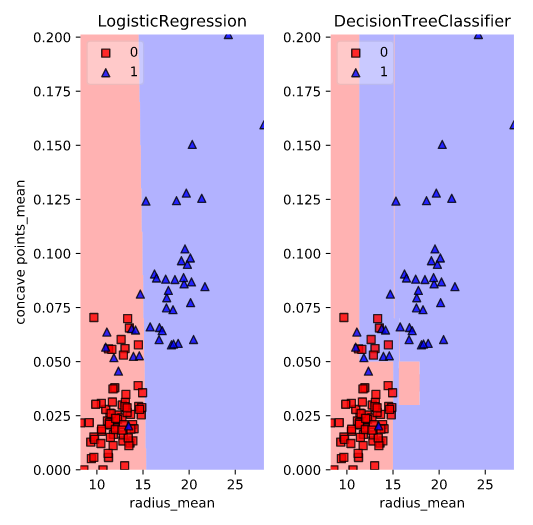

**Types of nodes**
- root and internal nodes have no question and have children
- leaf has no questions and just gives the prediction
- each leaf will predict a single class(multiple leaves can ofcourse classifiy to same class)
- nodes are split by maximizing information gain
- `IG(f,sp) = I(parent) - (Nleft/N * I(left) + Nright/N * I(right))`
- N is number of samples, f is feature, sp is split point
- I(node) can be
  - entropy
  - Gini index
- if IG(node)=0, its a leaf
- for contrained trees (where depth is mentioned), at that depth, all nodes will be declated leaf

### Entropy vs gini

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)

dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train);

In [32]:
from sklearn.metrics import accuracy_score

y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)


y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_pred, y_test)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9210526315789473
Accuracy achieved by using the gini index:  0.9473684210526315


Nice work! Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

## Decision tree for regression

- In regression impurity of a node is measured by mse
- I(node) = mse(node) = (1/N)( sum((y-y')**2) )
- prediction at any node = average of samples in that node
- 

In [33]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [73]:
y = auto['mpg'].values
y.shape

(392,)

In [74]:
X = pd.concat((auto.drop('mpg',axis=1).drop('origin',axis=1), pd.get_dummies(auto['origin'])), axis=1)
X = X.values
X.shape

(392, 8)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((313, 8), (79, 8), (313,), (79,))

In [43]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13, #each leaf shoulhd have atleadt 13% of the dataset
            random_state=3)

# Fit dt to the training set
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [44]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = (mse_dt)**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.60


# The Bias-Variance Tradeoff

## Bias-variance

- **Overfitting**: fits the training set noise  -------  train error << valid error-------high variance
- **Underfitting** : approximated f (f-hat) is not flexible enough to reach real f .---------train error, valid error almost same but both high.-------high bias


`Error = bias^2 + varance + irreducable noise`



- we cant calculate true error
- but, error of test set ~= generalization error
- can use K-fold CV
- if CV error > train error **high variance**
  - reduce complexity
  - get more data
- if CV error ~= train error >> desired error **high bias**
  - increase model complexity
  - gather more features for the problem

In [0]:
from sklearn.model_selection import train_test_split

### Using auto dataset

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs.

In [46]:
from sklearn.model_selection import cross_val_score 

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


In [47]:
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set(just to get predictions)
dt.fit(X_train,y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train,y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


In [0]:
baseline_RMSE=5.1

dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels

## Ensemble

Problems with trees
- orthogonal decision boundaries only
- sensitive to small variations in training set
- unconstrained trees overfit easily
- solution :ensemble
- best results when we ensemble models that are skilful in different ways

In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import  LogisticRegression

Using Breast Cancer Dataset

In [0]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [60]:

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.939
K Nearest Neighbours : 0.912
Classification Tree : 0.895


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train,y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred,y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.921


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Bagging and Random Forests

## Bagging
- boostrap aggregation
- Training several times on different subsets of the dataset with replacement
- bagging has the effect of reducing variance of individual model in the ensemble
- here ensable is of a single algo but trained on bootstraped datasets
- final prediction
  - classification: majority voting
  - regression: averaging

In [63]:
X_train.shape, wbc.shape #breast cancer dataset

((455, 30), (569, 31))

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc, 50 trees
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [68]:
# Fit bc to the training set
bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.93


In [69]:
# Fit bc to the training set
dt.fit(X_train,y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of single tree: {:.2f}'.format(acc_test)) 

Test set accuracy of single tree: 0.93


in this case it doesnt look different, but in the exercise, with liver dataset, there was 8% improvement


## OOB
- in bagging some samples are samples multiple times, some not at all
- on avg 64% are sampled
- others are called OOB(out of bag) samples
- instead of CV, we can use these OOB instances to perform validation
- oob score of each model is the evaluation of that model on the oob instances
- then oob score of the entire model is the avg of all oob scores
- oob scores can be reasonable estimates of the CV accuracies/scores


![oob](oob.png)

In [0]:
### Breast Cancer Dataset

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [71]:
# Fit bc to the training set 
bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_pred,y_test)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.930, OOB accuracy: 0.943


## Random Forests

In random forest
- base estimator = decision tree
- bootstraping dome with sampled training set, size of which is same as the traniing set
- d features are sampled at each node without replacement
- In short: **Every training set is different, and trained of a different decision tree(cause different features)**
- d defaults to the sqrt(num of features)
- random forest achieves a lower variance than individual trees
- **Feature Importance** can be assesed from tree based models from `model.feature_importance_`
- Types:
  - RandomForestRegressor
  - RandomForestClassifier

**Bike Dataset Used**

In [77]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [78]:
bike.dtypes

hr                          int64
holiday                     int64
workingday                  int64
temp                      float64
hum                       float64
windspeed                 float64
cnt                         int64
instant                     int64
mnth                        int64
yr                          int64
Clear to partly cloudy      int64
Light Precipitation         int64
Misty                       int64
dtype: object

In [83]:
bike.hr.value_counts()

23    62
22    62
1     62
2     62
3     62
4     62
5     62
6     62
7     62
8     62
9     62
10    62
11    62
12    62
13    62
14    62
15    62
16    62
17    62
18    62
19    62
20    62
21    62
0     62
Name: hr, dtype: int64

In [115]:
y = bike.hr
X = bike.drop('hr',axis=1)
X.shape, y.shape

((1488, 12), (1488,))

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2)

In [84]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train,y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [85]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 4.66


In [0]:
import matplotlib.pyplot as plt

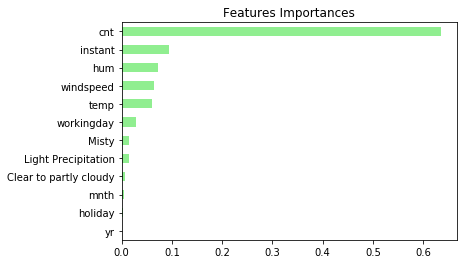

In [89]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# Boosting

- Many predictors are trained, and each learns from its predecessor
- Many weak learners are combined to form a strong learner
- training an enseble sequentially, next one trying to correct the previous one

### AdaBoost
- the training samples are **weighted**, based on being wrongly predicted
- important parameter is eta
- eta=[0,1] used to shrink the value of alpha(the weight that will be applied to wrong predictions in next predictor)
- there is a tradeoff between eta and the number of estimators
- smaller eta should be compensated by larger number of estimators
- types:
  - AdaBoostClassifier : by weighted majority voting of all the predictors
  - AdaBoostRegressor : weighted avg


![ada1.png](ada1.png)

![ada2.png](ada2.png)

![ada3.png](ada3.png)

**Using Breast Cancer Dataset**
In addition, given that this dataset is imbalanced(liver dataset), you'll be using the ROC AUC score as a metric instead of accuracy

In [0]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [0]:
# Fit ada to the training set
ada.fit(X_train,y_train)
# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

ROC AUC score of a binary classifier can be determined using the roc_auc_score() function from sklearn.metrics.

In [97]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test,y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 1.00


## Gradient Boosting
- has won many ML competition
- also sequencial ensemble training
- but the weights of the data are not tweaked
- instead the residual errors are treated as labels in the next model
- an important parameter is shrinkage (eta)
- here also eta=[0,1] and had tradeoff with number of estimators
- final prediction  = `y1 + eta*y2 + eta*y3 +...`
- types:
  - GradientBoostingRegressor
  - GradientBoostingClassifier
- base classifier is decision trees

![gr1.png](gr1.png)

![gr2.png](gr2.png)

![gr3.png](gr3.png)

**Bike Dataset**

In [0]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
## notice no separate prector mentioned
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

In [0]:
# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [102]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 4.203


## Stochastic Gradient Boosting
- GB is an extensive search procedure, that may end up using the same features and split points for several trees
- in stochastic GB, each tree uses a random subset(.4 to .8) of the training set, without replacement
- features are also sampled (without replacement)
- this creates further ensemble diversity
- effect: creates more variance in the ensemble

![sgb.png](sgb.png)

In [0]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9, #what percent of data to sample
            max_features=0.75, #what percent of feature to consider in each split
            n_estimators=200,                                
            random_state=2)

In [0]:
# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

In [105]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 4.210


Exercise: The stochastic gradient boosting regressor achieves a lower test set RMSE(49.979) than the gradient boosting regressor (which was 52.065)!

# Model Tuning

- dt.get_params()
- grid.best_params_
- grid.best_estimator_
- 

**Using Breast Cancer Dataset**

## Grid Search on DT

In [0]:
# Define params_dt
params_dt = {'max_depth':[2,3,4],'min_samples_leaf':[ 0.12, 0.14, 0.16, 0.18]}

In [0]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',               ## for imbalanced dataset
                       cv=5,
                       n_jobs=-1)

In [113]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             pre_dispat

In [114]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test,y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.967


## Grid Search on Ensemble
**On bike dataset**

![hp.png](hp.png)

In [0]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[100,350,500],'max_features':['log2', 'auto', 'sqrt'],'min_samples_leaf':[2,10,30]}

In [0]:
rf = RandomForestRegressor(n_estimators=25,random_state=2)

In [0]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. 

In [121]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   27.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=25, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt']

In [122]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 4.378


Previously it was 4.66 (just rf)